<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass06_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all Libraries**

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# **Load the data**

In [7]:
bank = pd.read_csv('/content/bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


## **EDA for data cleaning and understanding data**

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25340 entries, 0 to 25339
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        25340 non-null  int64  
 1   job        25340 non-null  object 
 2   marital    25340 non-null  object 
 3   education  25340 non-null  object 
 4   default    25340 non-null  object 
 5   balance    25340 non-null  int64  
 6   housing    25339 non-null  object 
 7   loan       25339 non-null  object 
 8   contact    25339 non-null  object 
 9   day        25339 non-null  float64
 10  month      25339 non-null  object 
 11  duration   25339 non-null  float64
 12  campaign   25339 non-null  float64
 13  pdays      25339 non-null  float64
 14  previous   25339 non-null  float64
 15  poutcome   25339 non-null  object 
 16  y          25339 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 3.3+ MB


# One-Hot Encoding of categrical variables

In [9]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5.0,may,261.0,1.0,-1.0,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5.0,may,151.0,1.0,-1.0,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5.0,may,76.0,1.0,-1.0,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5.0,may,92.0,1.0,-1.0,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5.0,may,198.0,1.0,-1.0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25335,34,no,47,yes,no,18.0,nov,810.0,2.0,-1.0,...,1,0,0,1,0,0,0,0,0,1
25336,33,no,17455,yes,yes,18.0,nov,168.0,3.0,179.0,...,0,1,0,1,0,0,1,0,0,0
25337,32,no,491,yes,no,18.0,nov,131.0,3.0,194.0,...,1,0,0,1,0,0,1,0,0,0
25338,35,no,2472,no,no,18.0,nov,586.0,2.0,-1.0,...,0,1,0,1,0,0,0,0,0,1


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25340 entries, 0 to 25339
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  25340 non-null  int64  
 1   default              25340 non-null  object 
 2   balance              25340 non-null  int64  
 3   housing              25339 non-null  object 
 4   loan                 25339 non-null  object 
 5   day                  25339 non-null  float64
 6   month                25339 non-null  object 
 7   duration             25339 non-null  float64
 8   campaign             25339 non-null  float64
 9   pdays                25339 non-null  float64
 10  previous             25339 non-null  float64
 11  y                    25339 non-null  object 
 12  job_admin.           25340 non-null  uint8  
 13  job_blue-collar      25340 non-null  uint8  
 14  job_entrepreneur     25340 non-null  uint8  
 15  job_housemaid        25340 non-null 

In [16]:
# Custom Binary Encoding of Binary o/p variables
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5.0,may,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5.0,may,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5.0,may,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5.0,may,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5.0,may,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25335,34,0,47,1,0,18.0,nov,810.0,2.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
25336,33,0,17455,1,1,18.0,nov,168.0,3.0,179.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
25337,32,0,491,1,0,18.0,nov,131.0,3.0,194.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
25338,35,0,2472,0,0,18.0,nov,586.0,2.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1


In [17]:
# Find and Replace Encoding for month categorical varaible
data1['month'].value_counts()

may    7957
jul    6380
aug    5215
jun    4486
nov    1221
oct      80
Name: month, dtype: int64

In [18]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}


In [22]:
data1=data1.replace(order)
data1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5.0,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5.0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5.0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25340 entries, 0 to 25339
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  25340 non-null  int64  
 1   default              25340 non-null  int64  
 2   balance              25340 non-null  int64  
 3   housing              25340 non-null  int64  
 4   loan                 25340 non-null  int64  
 5   day                  25339 non-null  float64
 6   month                25339 non-null  float64
 7   duration             25339 non-null  float64
 8   campaign             25339 non-null  float64
 9   pdays                25339 non-null  float64
 10  previous             25339 non-null  float64
 11  y                    25340 non-null  int64  
 12  job_admin.           25340 non-null  uint8  
 13  job_blue-collar      25340 non-null  uint8  
 14  job_entrepreneur     25340 non-null  uint8  
 15  job_housemaid        25340 non-null 

In [25]:
data1 = data1.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25339 entries, 0 to 25338
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  25339 non-null  int64  
 1   default              25339 non-null  int64  
 2   balance              25339 non-null  int64  
 3   housing              25339 non-null  int64  
 4   loan                 25339 non-null  int64  
 5   day                  25339 non-null  float64
 6   month                25339 non-null  float64
 7   duration             25339 non-null  float64
 8   campaign             25339 non-null  float64
 9   pdays                25339 non-null  float64
 10  previous             25339 non-null  float64
 11  y                    25339 non-null  int64  
 12  job_admin.           25339 non-null  uint8  
 13  job_blue-collar      25339 non-null  uint8  
 14  job_entrepreneur     25339 non-null  uint8  
 15  job_housemaid        25339 non-null 

# **Model Building**

In [26]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:11],data1.iloc[:,12:]],axis=1)
y=data1.iloc[:,11]

In [27]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Predictions**

In [28]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
25334,0,0
25335,0,0
25336,0,0
25337,0,0


# **Testing Model Accuracy**

In [30]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[23841,   252],
       [  908,   338]])

In [31]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

In [32]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0
classifier.predict_proba(x)[:,1]

array([0.01622028, 0.01888631, 0.02519652, ..., 0.03253329, 0.02652645,
       0.07089929])

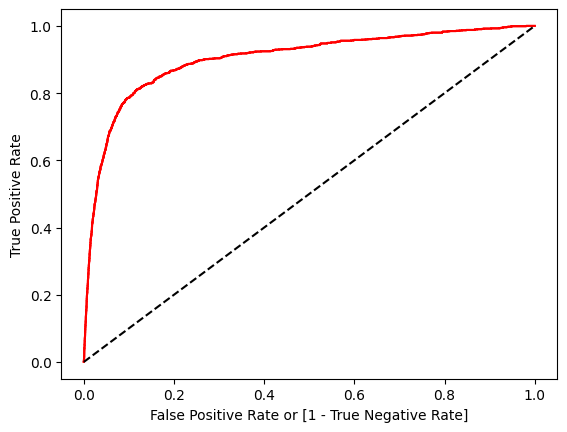

auc accuracy: 0.6304042941147195


In [33]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)